# L9 Growth Laws

## Overview

Bacterial growth laws are a phenomenological approach to modeling cellular growth. These models, rather than being described from the bottom-up using first principles, take a top-down approach to describe emperical relationships between variables. Some of these relationships, between the growth rate of *E. coli* cells and the partitioning of their proteomes are described in [Scott et al](https://www.science.org/doi/10.1126/science.1192588).

In this notebook, we will explore the data and models implemented in this paper to gain a better understanding of the models they used and how those models arise from the data.

In [ ]:
%reset

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Relationship Between RNA/Protein ratio and Ribosomal Fraction

Throughout the paper, the RNA/Protein ratio (r) is used as a measure of the cell state. This ratio is also directly proportional to the Ribosomal Fraction (or the Extended-Ribosome-Protein/Protein ratio, $\phi_{R}$) that indicates what % of the cellular proteins are being devoted to translation. Throughout the paper, both r and $\phi_{R}$ are included on the y-axis of the same plots, which is only possible if they are directly proportional.

These two quantities are related through a proportionality constant $\rho$ as described below:

RNA/Protein Ration:

$\large r = \frac{M_{RNA}}{M}$; $M_{RNA}$: Mass of RNA in the cell; $M$: Mass of proteins in the cell

Ribosomal Fraction:

$\large \phi_{R} = \frac{M_{R}}{M}$; $M_{R}$: Mass of the extended ribosomal proteins in the cell, which is the ribosomal proteins + affiliates (initiation/elongation factores, tRNA synthetase, etc.)

Proportinality constant $\rho$ divided into three components

$\large \phi_{R} = \rho r$

$\large \rho = \frac{M_{rRNA}}{M_{RNA}} \frac{M_{rp}}{M_{tRNA}} \frac{M_{R}}{M_{rp}}$

$ \frac{M_{rRNA}}{M_{RNA}}=0.86$; $M_{rRNA}$: Mass of ribosomal RNA

$ \frac{M_{rp}}{M_{rRNA}}=0.53$; $M_{rp}$: Mass of ribosomal Proteins

$ \frac{M_{R}}{M_{rp}}=1.67$;

$\large \phi_{R} = 0.76 * r$

The conversion from $r$ to $\phi_{R}$ assumes that all three of these components are independent of the cellular growth rate. This assumption is used throughtout the paper to relate these two quantities and include them on the same plots.

We will implement this calculation below and explore the consequences of this assumption.

Note that in the paper $\lambda$ is used to represent the growth rate, here we will use $g$ throughout.

### Linear dependence of RNA/Protein ratio on growth rate

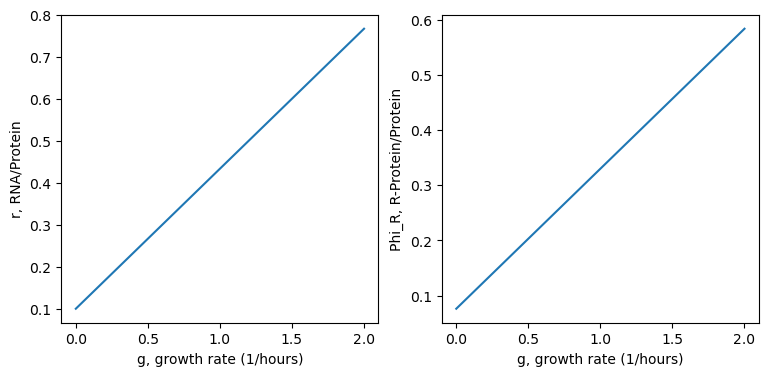

In [2]:
[fig,axs] = plt.subplots(1,2,figsize=[9,4])

# vary the growth rate between 0 and 2 (1/hours)
g = np.linspace(0,2,100) 

# define an arbitrary line for the dependence between growth rate (g) and RNA/protein ratio (r)
m = 1/3
b = 0.1
r = m*g + b

# Plot g vs r
axs[0].plot(g,r)
axs[0].set_xlabel('g, growth rate (1/hours)')
axs[0].set_ylabel('r, RNA/Protein');

# convert r to phi_R
Ratio_1 = 0.86
Ratio_2 = 0.53
Ratio_3 = 1.67
phi_R = Ratio_1*Ratio_2*Ratio_3*r

# Plot g vs phi_R
axs[1].plot(g,phi_R)
axs[1].set_xlabel('g, growth rate (1/hours)')
axs[1].set_ylabel('Phi_R, R-Protein/Protein');

##### QUESTION 1
1. What if the assumption did not hold and one of the variables in the conversion was dependent on the growth rate. Assume that the Ratio, $\frac{M_{R}}{M_{rp}}$ is not constant, but directly proportional to growth rate ($\frac{M_{R}}{M_{rp}}=Cg$, where $C$ is some constant).
   * a. Explain how the relationship between the Ribosome Fraction $\phi_{R}$ and growth rate (g) has changed.
   * b. Include a new plot of $\phi_{R}$ vs growth rate (g) in your answer.

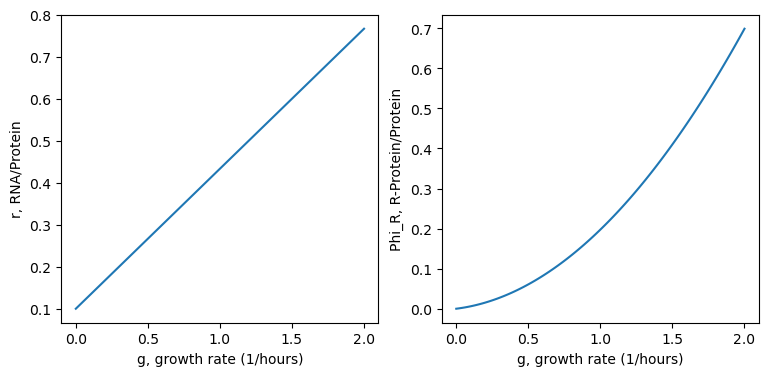

In [7]:
[fig,axs] = plt.subplots(1,2,figsize=[9,4])

# vary the growth rate between 0 and 2 (1/hours)
g = np.linspace(0,2,100) 

# define an arbitrary line for the dependence between growth rate (g) and RNA/protein ratio (r)
m = 1/3
b = 0.1
r = m*g + b

# Plot g vs r
axs[0].plot(g,r)
axs[0].set_xlabel('g, growth rate (1/hours)')
axs[0].set_ylabel('r, RNA/Protein');

# convert r to phi_R
Ratio_1 = 0.86
Ratio_2 = 0.53
Ratio_3 = g
phi_R = Ratio_1*Ratio_2*Ratio_3*r

# Plot g vs phi_R
axs[1].plot(g,phi_R)
axs[1].set_xlabel('g, growth rate (1/hours)')
axs[1].set_ylabel('Phi_R, R-Protein/Protein');

### Growth Law 1

$\large r = r_{0} + \frac{g}{\kappa_{t}}$

The first growth law discussed in the paper is indeed a linear correlation between the RNA/Protein ratio (or Ribosomal Fraction) with growth rate. This relationship is emperically derived from data. We will load the data from the supplement of the paper and explore this relationship.

The datasets have been saved as .csv files, which can be loaded into dataframes using pandas.


#### Data Set 1 (Wild Type *E. coli*)

In [3]:
# load data with pandas
df_1 = pd.read_csv('Data1.csv')

# View dataframe
df_1

,Medium,Growth rate (1/h),RNA/Protein (ug/ug),Study
0,M63+glyc,0.40±0.03 (2),0.177±0.006 (2),This Study
1,M63+gluc,0.57±0.02 (5),0.230±0.014 (2),This Study
2,cAA+glyc,0.71±0.03 (4),0.224±0.029 (3),This Study
3,cAA+gluc,1.00±0.05 (5),0.287±0.009 (3),This Study
4,RDM+glyc,1.31±0.07 (3),0.414±0.058 (3),This Study
5,RDM+gluc,1.58±0.15 (3),0.466±0.033 (3),This Study
6,TRIS + acetate,0.38,0.189,Forchhammer and Lindahl
7,TRIS + succ,0.6,0.224,Forchhammer and Lindahl
8,TRIS + gluc,1.04,0.295,Forchhammer and Lindahl
9,TRIS + cAA+ gluc,1.46,0.421,Forchhammer and Lindahl


In [4]:
# extract raw growth rate data
g_raw = df_1['Growth rate (1/h)']

# extract raw RNA/Protein data
r_raw = df_1['RNA/Protein (ug/ug)']

# clean up data (remove the error and number of samples from the "This Study" data
g = g_raw.copy()
for i in range(len(g)): #for each element
    g[i] = float(str.split(g_raw[i],'±')[0]) #replace with cleaned up version

r = r_raw.copy()
for i in range(len(r)): #for each element
    r[i] = float(str.split(r_raw[i],'±')[0]) #replace with cleaned up version

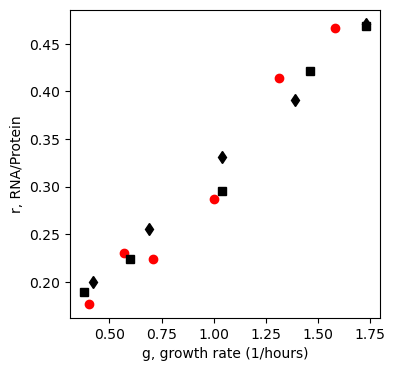

In [5]:
# Plot data
[fig,axs] = plt.subplots(1,1,figsize=[4,4])
# Plot g vs r
for i in range(len(g)):
    if df_1['Study'][i] == 'This Study':
        s = 'o'
        c = 'r'
    elif df_1['Study'][i] == 'Forchhammer and Lindahl':
        s = 's'
        c = 'k'
    elif df_1['Study'][i] == 'Bremer and Dennis':
        s = 'd'
        c = 'k'
        
    axs.plot(g[i],r[i],marker = s,color = c)
axs.set_xlabel('g, growth rate (1/hours)')
axs.set_ylabel('r, RNA/Protein');

Now that we have loaded and plotted the data, we will fit it to a line to find the parameters of the model. We will use the numpy polyfit command to fit the data. The ouput of this function is a list of coefficients for the equation: $y=C_0*x+C_1$.

Intercept: 0.093 Slope: 0.221


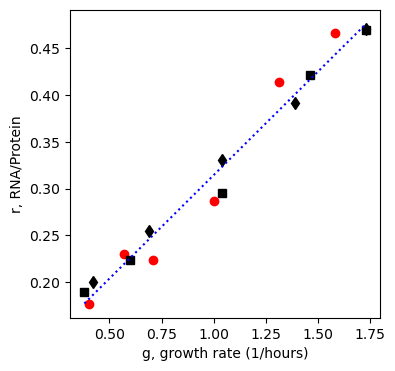

In [6]:
# Fit data to a line
C = np.polyfit(list(g), list(r), 1)

x = np.array([np.min(g),np.max(g)])
y = x*C[0]+C[1]

# Plot data
[fig,axs] = plt.subplots(1,1,figsize=[4,4])
# Plot g vs r
for i in range(len(g)):
    if df_1['Study'][i] == 'This Study':
        s = 'o'
        c = 'r'
    elif df_1['Study'][i] == 'Forchhammer and Lindahl':
        s = 's'
        c = 'k'
    elif df_1['Study'][i] == 'Bremer and Dennis':
        s = 'd'
        c = 'k'
        
    axs.plot(g[i],r[i],marker = s,color = c)
axs.set_xlabel('g, growth rate (1/hours)')
axs.set_ylabel('r, RNA/Protein');

# Plot line
axs.plot(x,y,'b:')

print('Intercept:',np.round(C[1],3),'Slope:',np.round(C[0],3))

##### QEUSTION 2
2. Given the fit of this line (Intercept = 0.093, slope = 0.221) what are the corresponding parameters of the model?
    * a. What is the value of $r_{0}$?
    * b. What is the value of $\kappa_{t}$?

#### Data Set 2 (*E. coli* mutant strains)

The data we just plotted is for wild-type *E. coli* strains grown across a variety of media. We can further investigate growth law 1 by looking at *E. coli* mutants that have various translation rates (due to ribosomal mutations), thus changing their "translation capacity" parameter $\kappa_{t}$. We will load the second data set, which has three different strains (Xax, UK285, and UK317) each of which has a different translation rate.

In [8]:
# load data with pandas
df_2 = pd.read_csv('Data2.csv')

# View dataframe
df_2

,Medium,Growth rate (1/h),RNA/Protein (ug/ug),Strain
0,cAA+gluc,1.03±0.04 (8),0.302±0.043 (8),Xac
1,cAA+glyc,0.83±0.03 (2),0.278±0.028 (8),Xac
2,M63+gluc,0.60±0.01 (2),0.199±0.027 (6),Xac
3,M63+glyc,0.54±0.01 (2),0.195±0.016 (6),Xac
4,cAA+gluc,0.82±0.02 (5),0.414±0.066 (5),UK285 (SmR)
5,cAA+glyc,0.71±0.04 (3),0.350±0.027 (3),UK285 (SmR)
6,M63+gluc,0.62±0.09 (4),0.318±0.046 (4),UK285 (SmR)
7,M63+glyc,0.47±0.10 (4),0.254±0.061 (4),UK285 (SmR)
8,cAA+gluc,0.57±0.02 (4),0.468±0.064 (4),UK317 (SmP)
9,cAA+glyc,0.45±0.03 (6),0.418±0.062 (6),UK317 (SmP)


In [9]:
# extract raw growth rate data
g_raw = df_2['Growth rate (1/h)']

# extract raw RNA/Protein data
r_raw = df_2['RNA/Protein (ug/ug)']

# clean up data (remove the error and number of samples from the "This Study" data
g = g_raw.copy()
for i in range(len(g)): #for each element
    g[i] = float(str.split(g_raw[i],'±')[0]) #replace with cleaned up version

r = r_raw.copy()
for i in range(len(r)): #for each element
    r[i] = float(str.split(r_raw[i],'±')[0]) #replace with cleaned up version

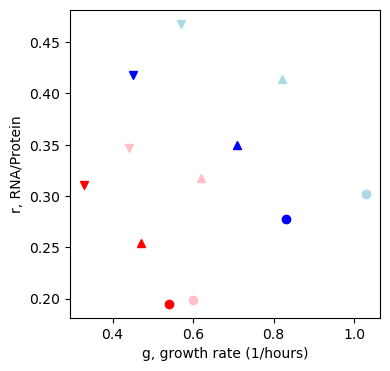

In [10]:
# Plot data
[fig,axs] = plt.subplots(1,1,figsize=[4,4])
# Plot g vs r
for i in range(len(g)):
    if df_2['Strain'][i] == 'Xac':
        s = 'o'
    elif df_2['Strain'][i] == 'UK285 (SmR)':
        s = '^'
    elif df_2['Strain'][i] == 'UK317 (SmP)':
        s = 'v'
    if df_2['Medium'][i] == 'cAA+gluc':
        c = 'lightblue'
    elif df_2['Medium'][i] == 'cAA+glyc':
        c = 'b'
    elif df_2['Medium'][i] == 'M63+gluc':
        c = 'pink'
    elif df_2['Medium'][i] == 'M63+glyc':
        c = 'r'
        
    axs.plot(g[i],r[i],marker = s,color = c)
axs.set_xlabel('g, growth rate (1/hours)')
axs.set_ylabel('r, RNA/Protein');

Xac, Intercept: 0.065 , Slope: 0.238  Kt: 4.206
UK285, Intercept: 0.04 , Slope: 0.448  Kt: 2.232
UK317, Intercept: 0.088 , Slope: 0.666  Kt: 1.502


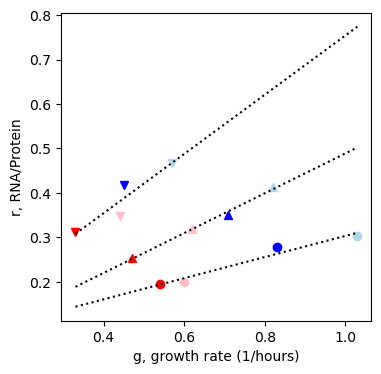

In [14]:
# Fit lines to data

# Plot data
[fig,axs] = plt.subplots(1,1,figsize=[4,4])
# Plot g vs r
for i in range(len(g)):
    if df_2['Strain'][i] == 'Xac':
        s = 'o'
    elif df_2['Strain'][i] == 'UK285 (SmR)':
        s = '^'
    elif df_2['Strain'][i] == 'UK317 (SmP)':
        s = 'v'
    if df_2['Medium'][i] == 'cAA+gluc':
        c = 'lightblue'
    elif df_2['Medium'][i] == 'cAA+glyc':
        c = 'b'
    elif df_2['Medium'][i] == 'M63+gluc':
        c = 'pink'
    elif df_2['Medium'][i] == 'M63+glyc':
        c = 'r'
        
    axs.plot(g[i],r[i],marker = s,color = c)
axs.set_xlabel('g, growth rate (1/hours)')
axs.set_ylabel('r, RNA/Protein');

# Fit a line to the Xac strain
C = np.polyfit(list(g)[0:4], list(r)[0:4], 1)
x = np.array([np.min(g),np.max(g)])
y = x*C[0]+C[1]
axs.plot(x,y,'k:');
print('Xac, Intercept:',np.round(C[1],3),', Slope:',np.round(C[0],3),' Kt:',np.round(1/C[0],3))

# Fit a line to the UK285 strain
C = np.polyfit(list(g)[4:8], list(r)[4:8], 1)
x = np.array([np.min(g),np.max(g)])
y = x*C[0]+C[1]
axs.plot(x,y,'k:');
print('UK285, Intercept:',np.round(C[1],3),', Slope:',np.round(C[0],3),' Kt:',np.round(1/C[0],3))

# Fit a line to the UK317 strain
C = np.polyfit(list(g)[8:12], list(r)[8:12], 1)
x = np.array([np.min(g),np.max(g)])
y = x*C[0]+C[1]
axs.plot(x,y,'k:');
print('UK317, Intercept:',np.round(C[1],3),', Slope:',np.round(C[0],3),' Kt:',np.round(1/C[0],3))


From the fit to this data, we can infer the $\kappa_{t}$ as 1/slope. For Xac strain, $\kappa_{t}=4.206$. For UK285, $\kappa_{t}=2.232$.

##### QUESTION 3
3. Fit a line to the UK317 data.
   * a. Include a new plot with this line.
   * b. What is the $\kappa_{t}$ for this strain?

##### QUESTION 4
4. List the strains in order of highest translation rate to lowest translation rate.

### Growth Law 2

From the dataset 2 above, we can start to observe a second relationship between growth rate ($g$) and RNA/Protein ratio ($r$). That is if we look at the points that are the same color (same medium) we see a line with a downward slope relating $r$ to $g$. This growth law is described through the following equation:

$\large r = r_{max} - \frac{g}{\kappa_{n}}$

In the above data, we used different *E. coli* strains with mutations in their ribosomes to alter the translational capacity. We can similarly alter this parameter through the addition of chloramphenicol. By varying the amount of chloramphenicol and the base medium we can further explore growth law 2. We will load dataset 3 here which does just this and measures the growth rate and RNA/Protein ratio.


#### Data Set 3 (chloramphenicol)

In [15]:
# load data with pandas
df_3 = pd.read_csv('Data3.csv')

# View dataframe
df_3

,Medium,Growth (1/h),RNA/Protein (ug/ug),Growth (1/h) Beta-gal experiment,Beta-gal/Protein
0,M63+glyc,0.40±0.03 (2),0.177±0.006 (2),0.40±0.02 (6),0.082±0.006 (6)
1,+2 μM Cme,0.33±0.01 (2),0.291±0.014 (2),0.35±0.01 (6),0.052±0.005 (6)
2,+4 μM Cm,0.24±0.01 (2),0.375±0.015 (2),0.26±0.01 (6),0.041±0.002 (6)
3,+8 μM Cm,0.19±0.03 (2),0.414±0.028 (2),0.15±0.02 (6),0.024±0.006 (6)
4,+12 μM Cm,0.12±0.01 (2),0.631±0.092 (2),0.11±0.01 (6),0.016±0.012 (6)
5,M63+gluc,0.57±0.02 (5),0.230±0.014 (2),0.57±0.02 (6),0.067±0.008 (6)
6,+2 μM Cm,0.50±0.02 (5),0.303±0.009 (4),0.48±0.01 (6),0.061±0.006 (6)
7,+4 μM Cm,0.39±0.04 (5),0.371±0.009 (4),0.38±0.02 (6),0.050±0.003 (6)
8,+8 μM Cm,0.30±0.02 (5),0.400±0.072 (4),0.21±0.10 (6),0.032±0.013 (6)
9,+12 μM Cm,0.23±0.03 (4),0.496±0.051 (4),0.20±0.09 (6),0.025±0.005 (6)


In [16]:
# extract raw growth rate data
g_raw = df_3['Growth (1/h)']

# extract raw RNA/Protein data
r_raw = df_3['RNA/Protein (ug/ug)']

# clean up data (remove the error and number of samples from the "This Study" data
g = g_raw.copy()
for i in range(len(g)): #for each element
    g[i] = float(str.split(g_raw[i],'±')[0]) #replace with cleaned up version

r = r_raw.copy()
for i in range(len(r)): #for each element
    r[i] = float(str.split(r_raw[i],'±')[0]) #replace with cleaned up version

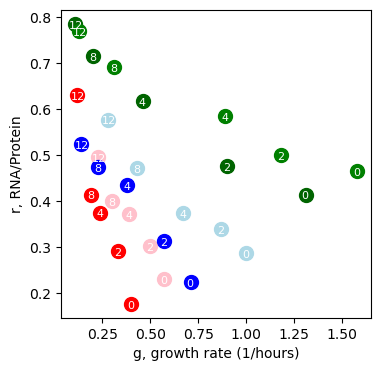

In [17]:
# Plot data
[fig,axs] = plt.subplots(1,1,figsize=[4,4])
# Plot g vs r
chlors = [0,2,4,8,12]
for i in range(len(g)):
    if i < 5: #M63+glyc
        c = 'r'
    elif i < 10: #M63+gluc
        c = 'pink'
    elif i < 15:
        c = 'b'
    elif i < 20:
        c = 'lightblue'
    elif i < 25:
        c = 'darkgreen'
    elif i < 30:
        c = 'g'
    
    axs.plot(g[i],r[i],marker = 'o',color = c,markersize=10)
    if np.mod(i,5) == 4:
        axs.text(g[i]-0.035,r[i]-0.01,chlors[np.mod(i,5)],fontsize=8,c='white')
    else:
        axs.text(g[i]-0.02,r[i]-0.01,chlors[np.mod(i,5)],fontsize=8,c='white')

axs.set_xlabel('g, growth rate (1/hours)')
axs.set_ylabel('r, RNA/Protein');


We will now fit a line to each of the different media to infer the parameters for growth law 2

M63+glyc , Intercept: 0.752 , Slope: -1.462
M63+gluc , Intercept: 0.641 , Slope: -0.707
cAA+glyc , Intercept: 0.603 , Slope: -0.516
cAA+gluc , Intercept: 0.655 , Slope: -0.377
RDM+glyc , Intercept: 0.783 , Slope: -0.304
RDM+gluc , Intercept: 0.773 , Slope: -0.208
intercepts avg rmax 0.7011439498456796
kn:  0.684
kn:  1.415
kn:  1.936
kn:  2.654
kn:  3.287
kn:  4.796
phirmax:  0.348


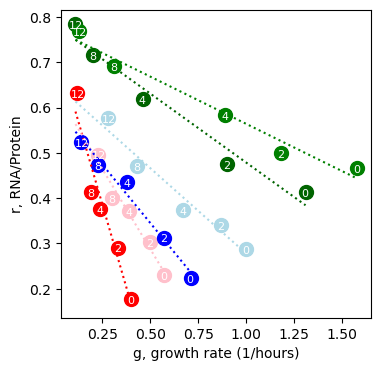

In [34]:
# Fit Lines

# Plot data
[fig,axs] = plt.subplots(1,1,figsize=[4,4])
# Plot g vs r
chlors = [0,2,4,8,12]
for i in range(len(g)):
    if i < 5: #M63+glyc
        c = 'r'
    elif i < 10: #M63+gluc
        c = 'pink'
    elif i < 15:
        c = 'b'
    elif i < 20:
        c = 'lightblue'
    elif i < 25:
        c = 'darkgreen'
    elif i < 30:
        c = 'g'
    
    axs.plot(g[i],r[i],marker = 'o',color = c,markersize=10)
    if np.mod(i,5) == 4:
        axs.text(g[i]-0.035,r[i]-0.01,chlors[np.mod(i,5)],fontsize=8,c='white')
    else:
        axs.text(g[i]-0.02,r[i]-0.01,chlors[np.mod(i,5)],fontsize=8,c='white')

axs.set_xlabel('g, growth rate (1/hours)')
axs.set_ylabel('r, RNA/Protein');

# Fit lines
media = ['M63+glyc','M63+gluc','cAA+glyc','cAA+gluc','RDM+glyc','RDM+gluc']
c = ['r','pink','b','lightblue','darkgreen','g']
g_list = list(g)
r_list = list(r)
intercepts = []
slopes = []
for i in range(len(media)):
    start_ind = i*5
    C = np.polyfit(g_list[start_ind:start_ind+5],r_list[start_ind:start_ind+5],1)
    x = np.array([np.min(g_list),np.max(g_list[start_ind:start_ind+5])])
    y = x*C[0]+C[1]
    axs.plot(x,y,':',color=c[i]);
    print(media[i],', Intercept:',np.round(C[1],3),', Slope:',np.round(C[0],3))
    intercepts.append(C[1])
    slopes.append(C[0])
    
print(f"intercepts avg rmax {sum(intercepts)/len(intercepts)}")

for i in range(len(slopes)):
    print('kn: ', np.round(-1/slopes[i],3))

phir_list = []
for r_ in r_list:
    Ratio_1 = 0.86
    Ratio_2 = 0.53
    Ratio_3 = 1.67
    phi_R = Ratio_1*Ratio_2*Ratio_3*r_
    phir_list.append(phi_R)

print('phirmax: ', np.round(sum(phir_list) / len(phir_list),3))


##### QUESTION 5
5. From the parameters estimated above for the fits of the lines, what are the parameters for the growth law 2 model?
   * a. Estimate one value for $r_{max}$ by taking the average of the estimate from all the lines.
   * b. Estimate one value for $\phi_{R}^{max}$. Use the constant relationship between $\phi_{R}$ and $r$ from above.
   * c. Estimate 6 different values for $\kappa_{n}$, one for each medium.

##### QUESTION 6
6. How does chloramphenicol disrupt bacterial growth and why is its mechanism of action relevant for this work?

### Integrated Theory (Bonus)

The two growth laws from the paper are integrated into a theory relating "translational capacity" ($\kappa_{t}$) and "nutritional capacity" ($\kappa_{n}$) to growth rate $g$ (or $\lambda$ in the paper). This theory is analogous to Ohm's law relating voltage ($V$), current ($I$) and resistance ($R$). The analogy is described in figure S6 from the paper (included below), where voltage is analogous to the protein allocation, current is analogous to growth rate, and conductance (1/resistance) is analogous to the translational or nutritional capacity.

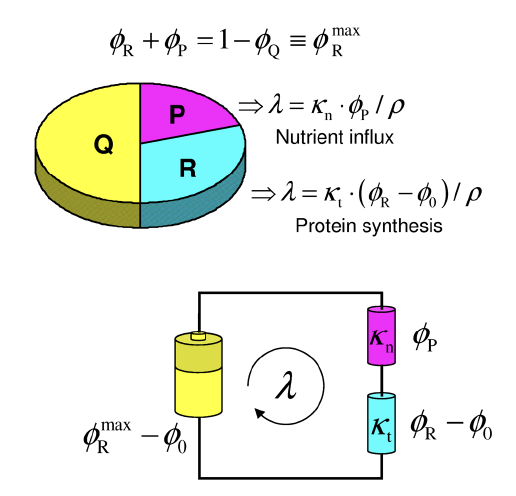

This theory gives rise to the overall equation for growth:

$\large \lambda(\kappa_{n},\kappa_{t})=\frac{(\phi_{R}^{max}-\phi_{0})}{\rho}\frac{\kappa_{n}\kappa_{t}}{\kappa_{n}+\kappa_{t}}$

We can visualize this function by plotting the surface below.

In [ ]:
phi_R_max = 0.45
phi_0 = 0.2
rho = 0.76
kt = np.linspace(0.1,10,100)
kn = np.linspace(0.1,10,100)
KN,KT = np.meshgrid(kn,kt)
g = ((phi_R_max-phi_0)/rho)*(KN*KT/(KN+KT))

fig = plt.figure(figsize=(5, 5))
axs = fig.add_subplot(111,projection='3d')
axs.set_box_aspect(aspect=None, zoom=0.8)
axs.plot_surface(KN,KT,g,rstride=1,cstride=1,cmap='viridis')
axs.set_xlabel('k_n')
axs.set_ylabel('k_t')
axs.set_zlabel('g')
axs.view_init(elev=30, azim=245)

We can also use the equations above to recreate the linear relationships observed in the data. Here we will change the $\kappa_n$ value. From the plots below we can see that the $\phi_P$ and $\phi_R$ are constrained to a line by the equation $\phi_P+\phi_R=\phi_R^{max}$. As $\kappa_n$ increases $g$ increases, $\phi_R$ increases, and $\phi_P$ decreases.

In [ ]:
phi_R_max = 0.45
phi_0 = 0.2
rho = 0.76
k_t = 5
k_n = np.linspace(0.1,10,10)
g = ((phi_R_max-phi_0)/rho)*((k_n*k_t)/(k_n+k_t))
phi_P = g*rho/k_n
phi_R = g*rho/k_t+phi_0

[fig,axs] = plt.subplots(1,3,figsize=[20,4])
axs[0].scatter(phi_P,phi_R,c=k_n)
axs[0].set_xlabel('phi_P')
axs[0].set_ylabel('phi_R')

axs[1].scatter(g,phi_R,c=k_n)
axs[1].set_xlabel('g')
axs[1].set_ylabel('phi_R')

h = axs[2].scatter(g,phi_P,c=k_n)
axs[2].set_xlabel('g')
axs[2].set_ylabel('phi_P');

fig.colorbar(im, ax=axs.ravel().tolist());


## Plotting All the Data (Bonus)

In [ ]:
# Load all data and plot it on the surface above. Requires finding all parameters and matching them up with growth rate.

# dataset 2
# load data
df_2 = pd.read_csv('Data2.csv')

# clean data
# extract raw growth rate data
g_raw = df_2['Growth rate (1/h)']
# extract raw RNA/Protein data
r_raw = df_2['RNA/Protein (ug/ug)']
# clean up data (remove the error and number of samples from the "This Study" data
g = g_raw.copy()
for i in range(len(g)): #for each element
    g[i] = float(str.split(g_raw[i],'±')[0]) #replace with cleaned up version
r = r_raw.copy()
for i in range(len(r)): #for each element
    r[i] = float(str.split(r_raw[i],'±')[0]) #replace with cleaned up version

# estimate parameters by fitting lines
g_list = list(g)
r_list = list(r)

# Plot data
[fig,axs] = plt.subplots(1,1,figsize=[4,4])
# Plot g vs r
for i in range(len(g)):
    if df_2['Strain'][i] == 'Xac':
        s = 'o'
    elif df_2['Strain'][i] == 'UK285 (SmR)':
        s = '^'
    elif df_2['Strain'][i] == 'UK317 (SmP)':
        s = 'v'
    if df_2['Medium'][i] == 'cAA+gluc':
        c = 'lightblue'
    elif df_2['Medium'][i] == 'cAA+glyc':
        c = 'b'
    elif df_2['Medium'][i] == 'M63+gluc':
        c = 'pink'
    elif df_2['Medium'][i] == 'M63+glyc':
        c = 'r'
        
    axs.plot(g[i],r[i],marker = s,color = c)
axs.set_xlabel('g, growth rate (1/hours)')
axs.set_ylabel('r, RNA/Protein');

g_matrix = np.array([g_list[0:4],g_list[4:8],g_list[8:12]])
r_matrix = np.array([r_list[0:4],r_list[4:8],r_list[8:12]])

# growth law 1
k_t_2 = np.zeros(g_matrix.shape[0])
r_0_2 = np.zeros(g_matrix.shape[0])
for i in range(g_matrix.shape[0]):
    # fit line
    C = np.polyfit(g_matrix[i,:],r_matrix[i,:],1)
    x = np.linspace(0,np.max(g_matrix),2)
    y = C[0]*x+C[1]
    axs.plot(x,y,'b:');
    k_t_2[i] = 1/C[0]
    r_0_2[i] = C[1]
    
# growth law 2
k_n_2 = np.zeros(g_matrix.shape[1])
r_max_2 = np.zeros(g_matrix.shape[1])
for i in range(g_matrix.shape[1]):
    # fit line
    C = np.polyfit(g_matrix[:,i],r_matrix[:,i],1)
    x = np.linspace(0,np.max(g_matrix),2)
    y = C[0]*x+C[1]
    axs.plot(x,y,'r:');
    k_n_2[i] = -1/C[0]
    r_max_2[i] = C[1]
axs.set_xlim(0,1.5)
axs.set_ylim(0,1);

g_matrix_2 = g_matrix.copy()

In [ ]:
# dataset 3
# load data
df_3 = pd.read_csv('Data3.csv')

# clean data
# extract raw growth rate data
g_raw = df_3['Growth (1/h)']
# extract raw RNA/Protein data
r_raw = df_3['RNA/Protein (ug/ug)']
# clean up data (remove the error and number of samples from the "This Study" data
g = g_raw.copy()
for i in range(len(g)): #for each element
    g[i] = float(str.split(g_raw[i],'±')[0]) #replace with cleaned up version
r = r_raw.copy()
for i in range(len(r)): #for each element
    r[i] = float(str.split(r_raw[i],'±')[0]) #replace with cleaned up version

# estimate parameters by fitting lines
g_list = list(g)
r_list = list(r)

# Plot data
[fig,axs] = plt.subplots(1,1,figsize=[4,4])
# Plot g vs r
chlors = [0,2,4,8,12]
for i in range(len(g)):
    if i < 5: #M63+glyc
        c = 'r'
    elif i < 10: #M63+gluc
        c = 'pink'
    elif i < 15:
        c = 'b'
    elif i < 20:
        c = 'lightblue'
    elif i < 25:
        c = 'darkgreen'
    elif i < 30:
        c = 'g'
    
    axs.plot(g[i],r[i],marker = 'o',color = c,markersize=10)
    if np.mod(i,5) == 4:
        axs.text(g[i]-0.035,r[i]-0.01,chlors[np.mod(i,5)],fontsize=8,c='white')
    else:
        axs.text(g[i]-0.02,r[i]-0.01,chlors[np.mod(i,5)],fontsize=8,c='white')

axs.set_xlabel('g, growth rate (1/hours)')
axs.set_ylabel('r, RNA/Protein');

g_matrix = np.array([g_list[0:5],g_list[5:10],g_list[10:15],g_list[15:20],g_list[20:25],g_list[25:30]])
r_matrix = np.array([r_list[0:5],r_list[5:10],r_list[10:15],r_list[15:20],r_list[20:25],r_list[25:30]])

# growth law 1
k_t_3 = np.zeros(g_matrix.shape[1])
r_0_3 = np.zeros(g_matrix.shape[1])
for i in range(g_matrix.shape[1]):
    # fit line
    C = np.polyfit(g_matrix[:,i],r_matrix[:,i],1)
    x = np.linspace(0,np.max(g_matrix),2)
    y = C[0]*x+C[1]
    axs.plot(x,y,'b:');
    k_t_3[i] = 1/C[0]
    r_0_3[i] = C[1]
    
# growth law 2
k_n_3 = np.zeros(g_matrix.shape[0])
r_max_3 = np.zeros(g_matrix.shape[0])
for i in range(g_matrix.shape[0]):
    # fit line
    C = np.polyfit(g_matrix[i,:],r_matrix[i,:],1)
    x = np.linspace(0,np.max(g_matrix),2)
    y = C[0]*x+C[1]
    axs.plot(x,y,'r:');
    k_n_3[i] = -1/C[0]
    r_max_3[i] = C[1]
    
axs.set_xlim(0,1.5)
axs.set_ylim(0,1);

g_matrix_3 = g_matrix.copy()

In [ ]:
# Plot points on theoretical surface
# df_2
rho = 0.76
# Estimate phi_R_max
phi_R_max = np.mean(r_max_2)*rho
# Estimate phi_0
phi_0 = np.mean(r_0_2)*rho
kt = np.linspace(0.1,10,100)
kn = np.linspace(0.1,10,100)
KN,KT = np.meshgrid(kn,kt)
g = ((phi_R_max-phi_0)/rho)*(KN*KT/(KN+KT))
fig = plt.figure(figsize=(5, 5))
axs = fig.add_subplot(111,projection='3d')
axs.set_box_aspect(aspect=None, zoom=0.8)
axs.plot_surface(KN,KT,g,rstride=1,cstride=1,cmap='viridis')
axs.set_xlabel('k_n')
axs.set_ylabel('k_t')
axs.set_zlabel('g')
axs.view_init(elev=30, azim=245)

for i in range(g_matrix_2.shape[0]):
    for j in range(g_matrix_2.shape[1]):
        axs.plot3D(k_n_2[j],k_t_2[i],g_matrix_2[i,j],'k.')

In [ ]:
# Plot points on theoretical surface
# df_3
rho = 0.76
# Estimate phi_R_max
phi_R_max = np.mean(r_max_3)*rho
# Estimate phi_0
phi_0 = np.mean(r_0_3)*rho
kt = np.linspace(0.1,10,100)
kn = np.linspace(0.1,10,100)
KN,KT = np.meshgrid(kn,kt)
g = ((phi_R_max-phi_0)/rho)*(KN*KT/(KN+KT))
fig = plt.figure(figsize=(5, 5))
axs = fig.add_subplot(111,projection='3d')
axs.set_box_aspect(aspect=None, zoom=0.8)
axs.plot_surface(KN,KT,g,rstride=1,cstride=1,cmap='viridis')
axs.set_xlabel('k_n')
axs.set_ylabel('k_t')
axs.set_zlabel('g')
axs.view_init(elev=30, azim=245)

for i in range(g_matrix_3.shape[0]):
    for j in range(g_matrix_3.shape[1]):
        axs.plot3D(k_n_3[i],k_t_3[j],g_matrix_3[i,j],'k.')